# 🚀 How to Run Python in an Open Workbook 

We will be using the **`xlwings`** library to connect to an Excel workbook<br>
**`xlwings`**  is an open-source Python library that makes it easy to **`automate Excel with Python`**😎<br><br>
👉 Link to Documentation: https://docs.xlwings.org/en/stable/index.html

### Datasets  [for demonstration purposes]

#### Install Packages

In [1]:
# Install packages into the instance of Python that launched the notebook
!pip install pandas --quiet
!pip install pandas_datareader --quiet

#### 1. Stock Market Data 📈

In [1]:
# Import libaries
import pandas as pd
from pandas_datareader import data

In [2]:
# Get Stockdata (only adjusted close)
def retrieve_stock_data(ticker_symbol):
    df = data.DataReader(ticker_symbol, 
                         start='2020-12-1', 
                         end='2020-12-31', 
                         data_source='yahoo')[['Adj Close']]
    df = df.rename(columns={"Adj Close": f"Adj Close {ticker_symbol}"})
    return df

df = retrieve_stock_data('TSLA')

In [3]:
# Print out head
df.head()

,Adj Close TSLA
Date,
2020-12-01,584.760010
2020-12-02,568.820007
2020-12-03,593.380005
2020-12-04,599.039978
2020-12-07,641.760010


#### 2. MPG Dataset  🚗

In [4]:
mpg = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


# 0. Installation & Import of xlwings

In [6]:
# Install xlwings into the instance of Python that launched the notebook
# xlwings comes preinstalled with Anaconda. Make sure to update your version to use the latest features
!pip install xlwings --upgrade --quiet 

In [5]:
# Import xlwings
import xlwings as xw

# 1. Quick & Easy Way

In [6]:
# Check datafrane
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [7]:
# View Dataset in Excel
xw.view(mpg)

In [8]:
# View Dataset in Excel
xw.view(df)

In [9]:
# Load selected data into pandas dataframe (New in version 0.22.0.)
ticker_df = xw.load()

In [10]:
# Print ticker_df
ticker_df

,Adj Close TSLA
Date,
2020-12-01,584.760010
2020-12-02,568.820007
2020-12-03,593.380005
2020-12-04,599.039978
2020-12-07,641.760010
2020-12-08,649.880005
2020-12-09,604.479980
2020-12-10,627.070007
2020-12-11,609.989990


In [11]:
# Check type of ticker_df
type(ticker_df)

pandas.core.frame.DataFrame

# 2. Connect to Excel Workbook

## Three different scenarios [New Book, Unsaved Book, Saved Book]

|  | xw.Book |
| :- | :- |
| New Book | xw.Book() |
| Unsaved book | xw.Book('Book1') |
| Book by (full)name | xw.Book(r'C:/path/to/file.xlsx')|


👉 **`xlwings`** Documentation: https://docs.xlwings.org/en/stable/connect_to_workbook.html

## 2.1 Connect to new workbook

In [12]:
# Open up a new Excel Workbook
wb = xw.Book()

In [13]:
# Define sheet
sht = wb.sheets[0]

In [14]:
# Write Data to cell A1
sht.range("A1").value = ticker_df

## 2.2 Connect to an open, but unsaved workbook

In [16]:
# Connect to unsaved workbook
wb = xw.Book("Book1")

In [17]:
wb

<Book [Book1]>

In [18]:
# Define sheet
sht = wb.sheets[0]

In [19]:
# Write stock data to worksheet
sht.range("A1").value = df

In [20]:
# Save Workbook
wb.save('stocks.xlsx')

In [21]:
# Close Workbook
wb.close()

## 2.3 Connect to an open and saved workbook

In [22]:
# Using pathlib (works on Mac & Windows)
from pathlib import Path # Standardlibrary (no need to install)
filename = Path("stocks.xlsx")

In [23]:
# Connect & open a saved Workbook
wb = xw.Book(filename)

In [24]:
# Specify Worksheet
sht = wb.sheets['Sheet1']

# 3. Practical Examples 

## 3.1 Basic Examples

In [25]:
# Add a new sheet
sht = wb.sheets.add('Basic Examples')

In [26]:
# Read single cell from Excel
ticker_symbol = sht.range('A1').value

In [27]:
# Print ticker_symbol
ticker_symbol

In [31]:
# Read range from Excel
ticker_symbol = sht.range('A1:A3').value

In [32]:
# Print ticker_symbol
ticker_symbol

['MMM', 'FB', 'TSLA']

In [33]:
# Insert Formula
sht.range('B1').formula = "=A1"

In [34]:
# Read Name Range
months = sht.range("months").value

In [35]:
# Print out months
months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [36]:
# Create Name Range
sht.range("A1:A3").name = "ticker_list"

In [37]:
# Read data from excel, store values in pandas dataframe
new_df = sht.range('D2').options(pd.DataFrame, expand='table').value

In [38]:
# Check new_df
new_df

,Sales,Profit
Jan,asdsa,ads
asd,sd,sd
Dec,asd,dasda
Apr,das,a
May,asd,d
asd,asd,dasda
Jul,das,None
adad,das,None
asdasdasd,das,None
Oct,None,None


In [39]:
# Save workbook as PDF
wb.to_pdf('MyPDF')

## 3.2 Plot Stockprice in Excel Workbook

In [40]:
# Install packages into the instance of Python that launched the notebook
!pip install matplotlib --quiet

In [41]:
# Import Matplotlib
import matplotlib.pyplot as plt

In [48]:
# Get Adj Close Price for given Tickersymbol and store values in a dataframe
df = retrieve_stock_data('GOOG')

In [49]:
# Check df
df.head()

,Adj Close GOOG
Date,
2020-11-30,1760.739990
2020-12-01,1798.099976
2020-12-02,1827.949951
2020-12-03,1826.770020
2020-12-04,1827.989990


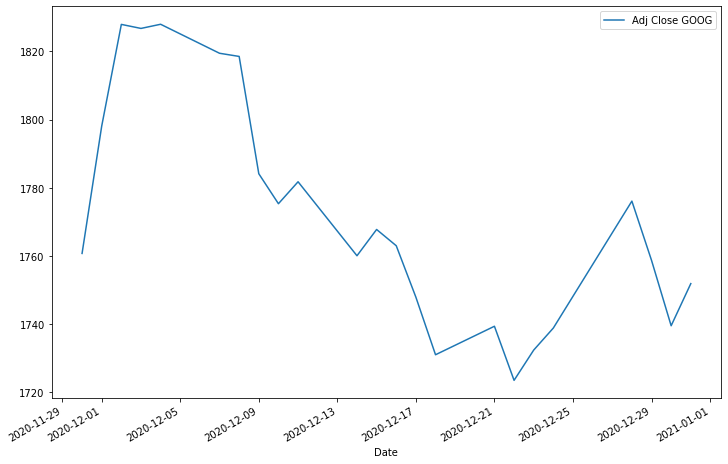

In [50]:
# Plot Adj. Close Price
fig = df.plot(figsize=(12,8))

In [51]:
# Get Figure Object
fig = fig.get_figure()

In [46]:
# Add a new sheet
sht = wb.sheets.add('Plot Stockprice')

In [52]:
# Add Picture to Excel
sht.pictures.add(fig, 
                 name='Stockprice', 
                 update=True)

<Picture 'Stockprice' in <Sheet [stocks.xlsx]Plot Stockprice>>

## 3.3 Connect Workbook to API's

In [53]:
# Install package into the instance of Python that launched the notebook
!pip install requests --quiet

In [54]:
# Imports
import requests
import urllib.request

### 3.3.1 Useless Fact

In [55]:
# Get Random Fact via API
def get_useless_fact():
    URL = "https://uselessfacts.jsph.pl/random.json?language=en"
    useless_fact = requests.get(URL).json()['text']
    return useless_fact

In [56]:
# Add New Worksheet
sht = wb.sheets.add('API')

In [59]:
# Save Random Fact in Worksheet
sht.range('A1').value = get_useless_fact()

### 3.3.1 Insert Image to Workbook (DOG API)

In [60]:
# Image location/name
filename = Path("dog.jpg")

# Retrieve & Save Dog Image
def get_dog_image(filename):
    API = "https://dog.ceo/api/breeds/image/random" # API Link
    URL = requests.get(API).json()['message'] # Get URL of dog image    
    dog_image = urllib.request.urlretrieve(URL, filename) # Download dog image
    return None

In [66]:
# Get a new dog iamge
get_dog_image(filename)

In [67]:
# Insert image in Excel
sht.pictures.add(filename.absolute(), # Path to Image
                 name='Dog', # Name requiered to update the image
                 update=True) # Updates the image

<Picture 'Dog' in <Sheet [stocks.xlsx]API>>

## 3.4 Generate Automated Stock Reports

In [68]:
# Install package into the instance of Python that launched the notebook
!pip install QuantStats --quiet

In [69]:
# Import quanstats library
import quantstats as qs

In [70]:
# Specify excel file location (works on Mac & Windows)
filename = Path("stock_report/stock_report.xlsx")

# Open Workbook
wb = xw.Book(filename)

# Select Sheet
sht = wb.sheets['Report']

In [71]:
def generate_stock_report_as_pdf():
    
    # --- EXCEL DATA ---
    # Get the ticker symbol from Worksheet
    ticker = sht.range('B3').value  
    
    ####################################################################
    
    # --- DO SOMETHING WITH THE EXCEL DATA IN PYTHON ---    
    # Fetch the daily returns for a stock 
    stock = qs.utils.download_returns(ticker)

    # Image location
    snapshot_path = Path('snapshot.png')
    heatmap_path = Path('return_heatmap.png')

    # Title of Snapshot Report
    title = f"{ticker} Performance"

    # Generate snapshot report of any given ticker symbol
    stock_snapshot = qs.plots.snapshot(stock,  
                                      title=title, 
                                      savefig=snapshot_path,
                                      show=False)

    # Generate montly return heatmap
    stock_heatmap = qs.plots.monthly_heatmap(stock, 
                                             savefig=heatmap_path,
                                             show=False)
    
    ######################################################################    
    
    # --- RETURN RESULT BACK TO EXCEL ---
    # Add Picutures to Excel
    sht.pictures.add(snapshot_path.absolute(), 
                     name='snapshot', 
                     update=True)
    sht.pictures.add(heatmap_path.absolute(), 
                     name='heatmap', 
                     update=True)

    # Save PDF Report
    wb.to_pdf('stockreport')
    
    return None

In [73]:
# Generate Stock Report and save as PDF
generate_stock_report_as_pdf()